### ADA-II – HW4 - Team 1 - 04/22/2022
Jen Arriaza (Lead) - 65%<br>
Junyu (Eric) Lin - 35%<br>
Byron Liu - 0%<br>
**Algorithms**: Ada Boost Classifier<br>
**Course**: Applied Data Analytics II, 2022 Spring<br>
**Professor**: Stavros Zervoudakis

In [1]:
import sys
!{sys.executable} -mpip install pip install pycaret

In [3]:
conda install -c conda-forge scikit-surprise

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg
import sys
import matplotlib.animation as animation
from IPython.display import HTML
import seaborn as sns
import pandas as pd
import os
import cv2
import pycaret

import plotly.offline as py
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default = "png"

# Ignore printing warnings for general readability
import warnings 
warnings.filterwarnings("ignore")

# pip install scikit-surprise
# Importing libraries for model building & evaluation
from sklearn.model_selection import train_test_split
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split, cross_validate, GridSearchCV
from surprise import accuracy

In [5]:
os.getcwd()

'C:\\Users\\Hehuan Zhang\\Desktop'

In [6]:
pip install azureml-opendatasets

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install azureml-opendatasets

Note: you may need to restart the kernel to use updated packages.


In [9]:
import opendatasets as od
od.download("https://www.kaggle.com/yasserh/wine-quality-dataset")

ModuleNotFoundError: No module named 'opendatasets'

In [10]:
df = pd.read_csv('WineQT.csv')

### Exploring WineQT dataset

In [11]:
df.shape

(1143, 13)

There are 1,143 rows and 13 columns

No missing values or duplicate exist in dataset

In [12]:
# Rename columns to a more readable format
df.rename(columns = {'fixed acidity': 'fixed_acidity', 'volatile acidity': 'volatile_acidity', 'citric acid': 'citric_acid', 'residual sugar': 'residual_sugar'}, inplace=True)

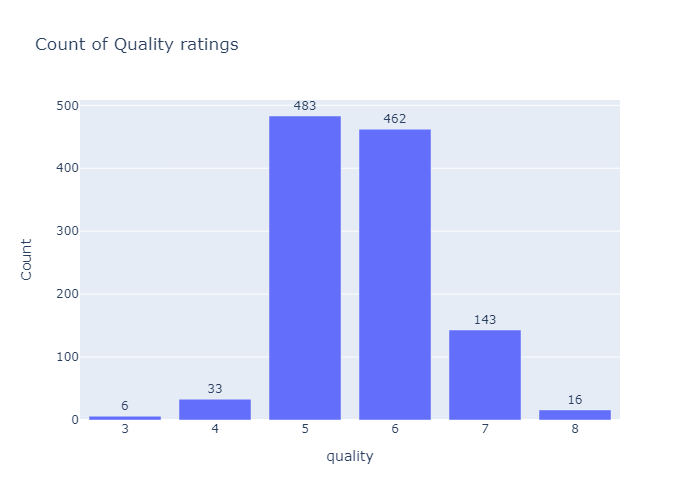

In [14]:
# Visualizing column of interest: quality

quality_ratings = df['quality'].value_counts()
x,y   = quality_ratings.index, quality_ratings.values
data  = go.Bar(x=x,y=y, text=y, textposition="outside")
Layout=go.Layout(title="Count of Quality ratings",xaxis={'title':'quality'},yaxis={'title':'Count'})
go.Figure(data,Layout)

#### Method
We will classify the data to two categories, good/not good for model interpretability and simplicity. The value counts indicate that there is significantly fewer "high quality" wines then there are mid and low quality.

In [15]:
df=df.replace({'quality' : { 3:0,4:0,5:0,6:0,7:1,8:1}})
df.quality.value_counts()

0    984
1    159
Name: quality, dtype: int64

In [16]:
import pycaret.classification

In [17]:
from pycaret.classification import *

In [24]:
train_quality = setup(data = df, target = 'quality', session_id=42,
                  normalize = True,
                  transformation = True, 
                  log_experiment = True,
                  handle_unknown_categorical = True, 
                  unknown_categorical_method = 'most_frequent',
                  remove_multicollinearity = True, #drop one of the two features that are highly correlated with each other
                  ignore_low_variance = True,#all categorical features with statistically insignificant variances are removed from the datasada.
                  combine_rare_levels = True,# all levels in categorical features below the threshold defined in rare_level_threshold param are combined togadaher as a single level
                    normalize_method='robust',    
            train_size = 0.8,fix_imbalance = True,silent=True
                )

,Description,Value
0,session_id,42
1,Target,quality
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(1143, 13)"
5,Missing Values,False
6,Numeric Features,12
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [25]:
model_ada=create_model('ada')
model_ada

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7717,0.8205,0.5714,0.3478,0.4324,0.3000,0.3145
1,0.8478,0.9357,0.8462,0.4783,0.6111,0.5254,0.5585
2,0.8152,0.8325,0.3077,0.3333,0.3200,0.2133,0.2135
3,0.8804,0.9124,0.7692,0.5556,0.6452,0.5755,0.5865
4,0.8352,0.9152,0.7692,0.4545,0.5714,0.4776,0.5030
5,0.8571,0.9053,0.6923,0.5000,0.5806,0.4972,0.5068
6,0.8571,0.8274,0.6923,0.5000,0.5806,0.4972,0.5068
7,0.8571,0.9004,0.7692,0.5000,0.6061,0.5236,0.5417
8,0.7473,0.7890,0.4615,0.2727,0.3429,0.1990,0.2096


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=42)

In [26]:
plot_model(model_ada,plot = 'parameter')

,Parameters
algorithm,SAMME.R
base_estimator,None
learning_rate,1.0
n_estimators,50
random_state,42


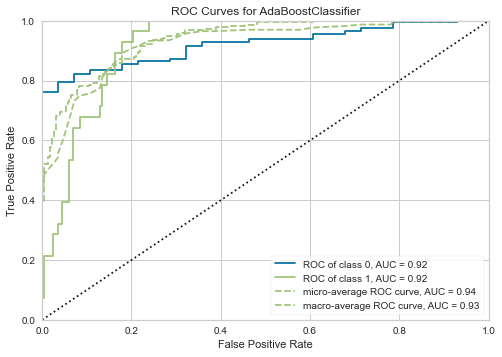

In [27]:
plot_model(model_ada,plot = 'auc')

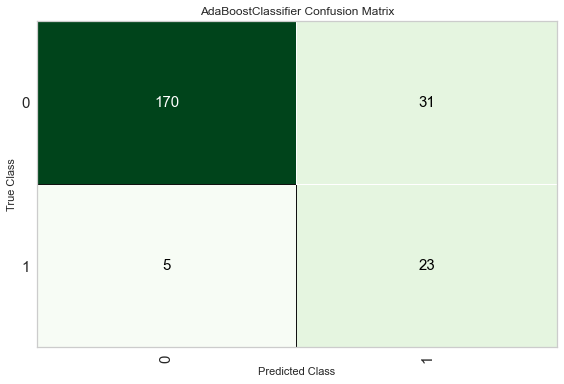

In [28]:
plot_model(model_ada,plot = 'confusion_matrix')

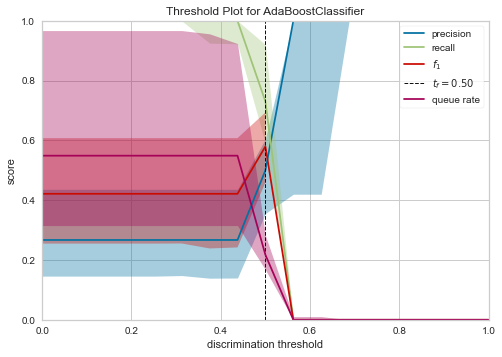

In [29]:
plot_model(model_ada,plot = 'threshold')

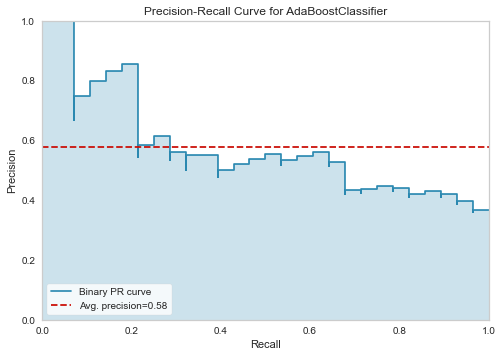

In [30]:
plot_model(model_ada,plot = 'pr')

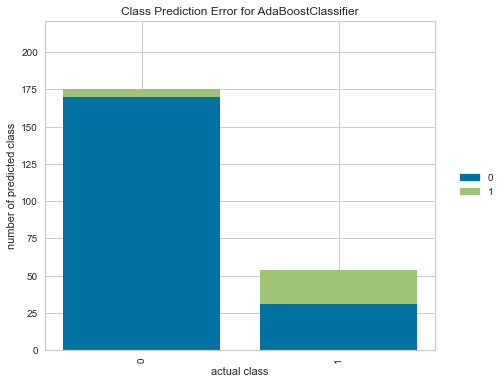

In [31]:
plot_model(model_ada,plot = 'error')

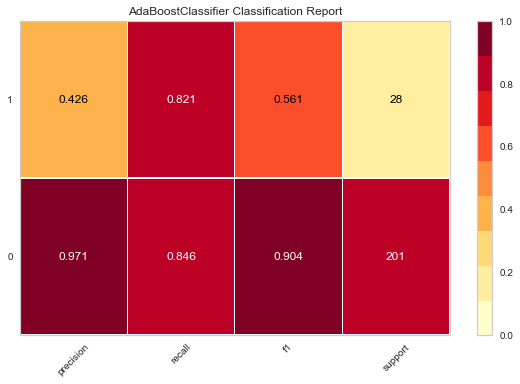

In [32]:
plot_model(model_ada,plot = 'class_report')

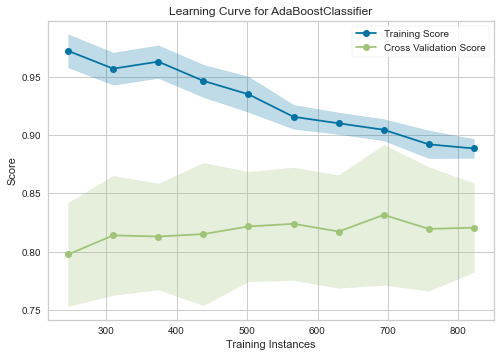

In [33]:
plot_model(model_ada,plot = 'learning')

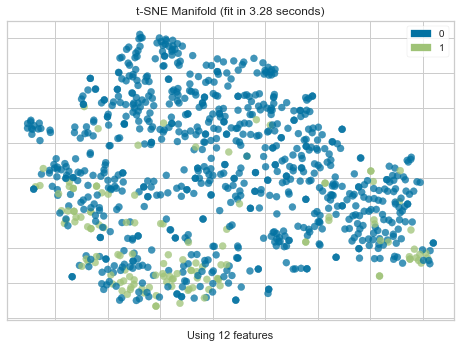

In [34]:
plot_model(model_ada,plot = 'manifold')

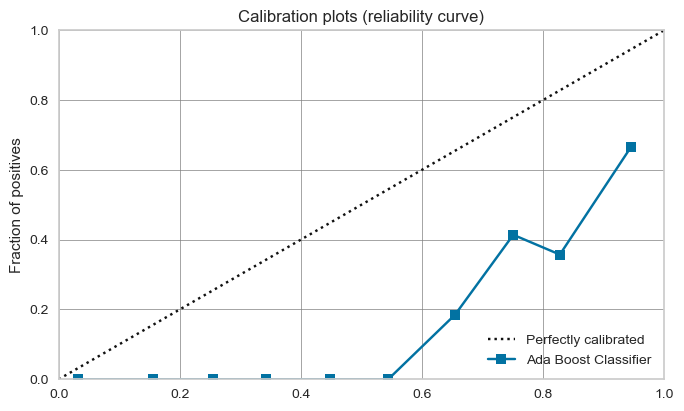

In [35]:
plot_model(model_ada,plot = 'calibration')

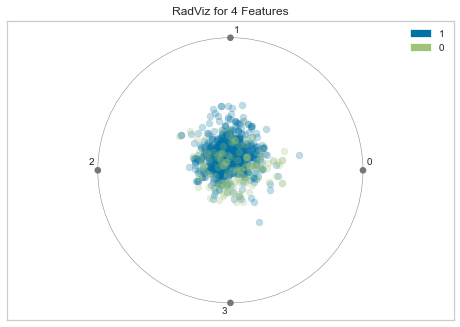

In [36]:
plot_model(model_ada,plot = 'dimension')

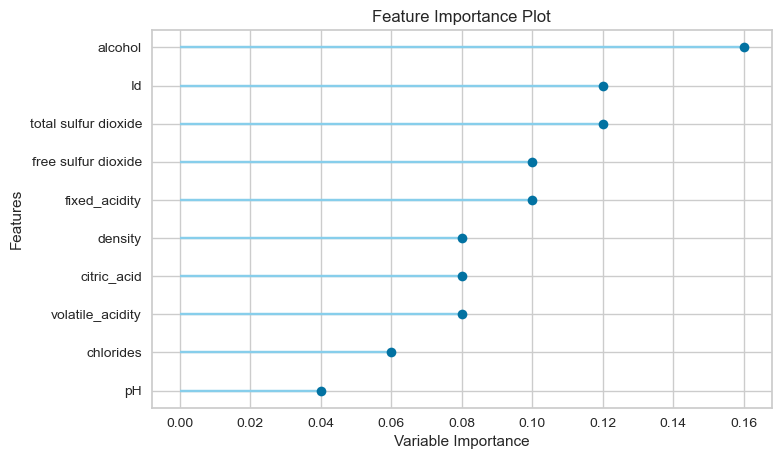

In [37]:
plot_model(model_ada,plot = 'feature')f

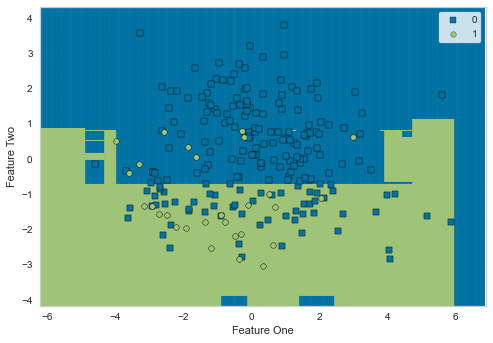

In [38]:
plot_model(model_ada,plot = 'boundary')

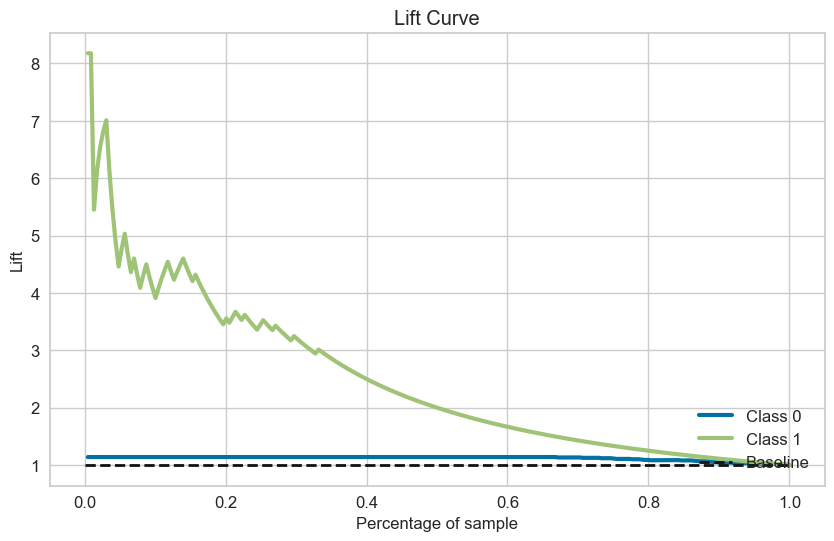

In [39]:
plot_model(model_ada,plot = 'lift')

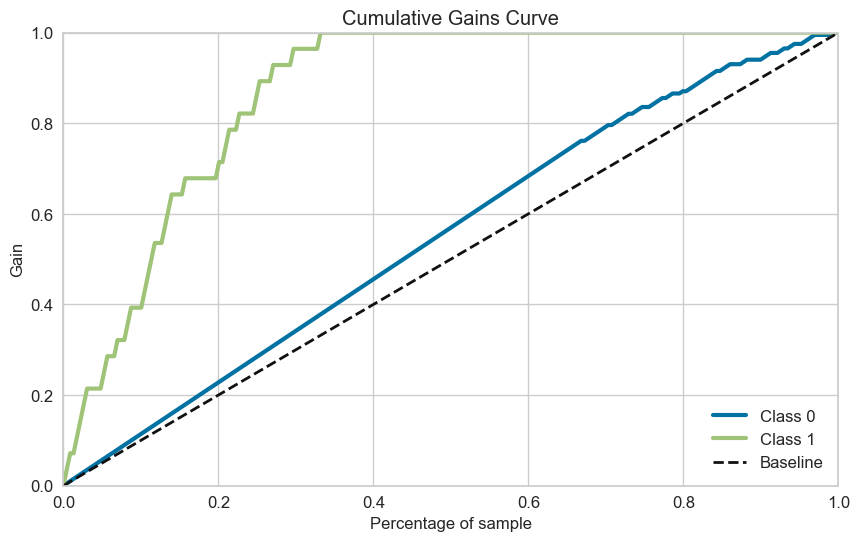

In [40]:
plot_model(model_ada,plot = 'gain')

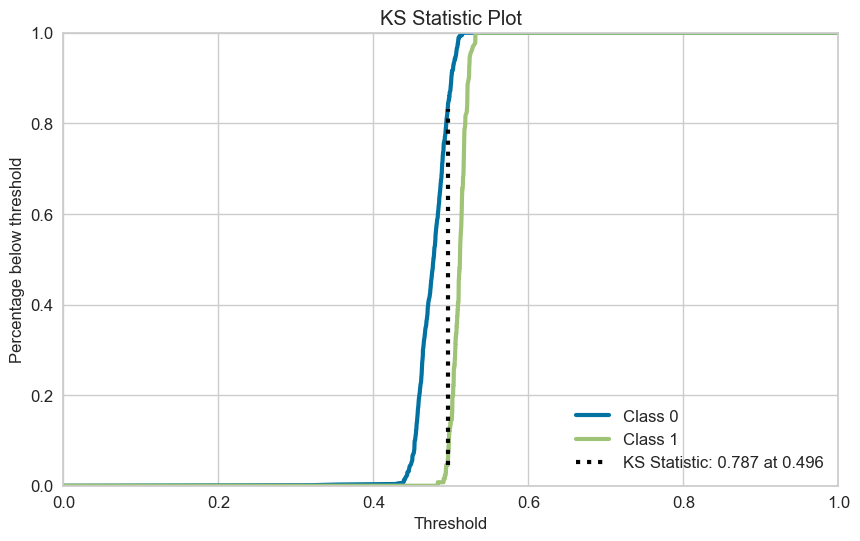

In [41]:
plot_model(model_ada,plot = 'ks')

In [42]:
predict_model(model_ada)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.8428,0.9208,0.8214,0.4259,0.5610,0.4767,0.5149


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id,quality,Label,Score
0,-0.921053,0.527046,-1.230201,-1.895474,-1.326168,-1.328965,-1.620192,-0.743747,0.706149,-0.169125,-0.930808,-1.266637,0,0,0.5302
1,-0.830884,1.595913,-0.193827,1.503993,-0.158387,0.302365,0.858514,0.909659,1.386195,0.654170,-1.359396,1.527079,0,0,0.5471
2,-0.742639,0.369987,-0.720928,-0.600715,0.524275,1.549657,1.824114,-0.556343,0.831384,-1.493742,0.291836,-0.862487,0,0,0.5232
3,-0.109307,-0.199998,1.874357,-1.186138,3.508033,0.084111,-0.255111,-0.048124,-1.506599,1.938607,-1.589862,-0.151048,0,0,0.5207
4,1.992912,0.475288,1.137548,1.577767,0.772615,-1.328965,-1.328331,2.200080,-0.398817,0.759948,1.299719,-0.655354,0,1,0.5083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,-2.849727,2.322694,-1.230201,-2.297531,-2.444499,1.861371,1.266533,-1.529570,2.697185,-1.493742,0.291836,-1.529459,0,0,0.5056
225,1.203432,-0.079527,0.838943,-0.353445,-0.449145,0.750032,0.481999,0.797877,-1.015509,0.654170,1.059919,-0.760143,0,1,0.5080
226,-0.921053,1.313303,-1.498103,0.930084,0.821748,-0.775432,-0.743064,-0.079583,0.893713,-0.551368,0.471193,-1.525367,0,0,0.5318
227,1.077379,-0.139360,-0.249830,2.683036,-0.327425,-0.036463,0.450974,2.446628,-1.015509,0.482543,-1.416004,-1.053763,0,0,0.5215


In [43]:
final_ada = finalize_model(model_ada)
final_ada

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=42)

In [44]:
save_model(final_ada, 'final_ada')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='quality',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_str...
                 ('feature_select', 'passthrough'),
                 ('fix_multi',
                  Fix_multicollinearity(correlation_with_target_preference=None,
                                        correlation_with_target_threshold=0.0,
                               